In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score,precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import warnings
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("creditcard.csv")
train=pd.read_csv("Train_credit.csv")
test=pd.read_csv("Test_credit.csv")

In [3]:
cols=list(df.columns)

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Dependent Variable Distribution
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#% of dependent variable
classes=df['Class'].value_counts()
normal_per=classes[0]/df['Class'].count()*100
fraud_per=classes[1]/df['Class'].count()*100

print(normal_per,fraud_per)

99.82725143693798 0.1727485630620034


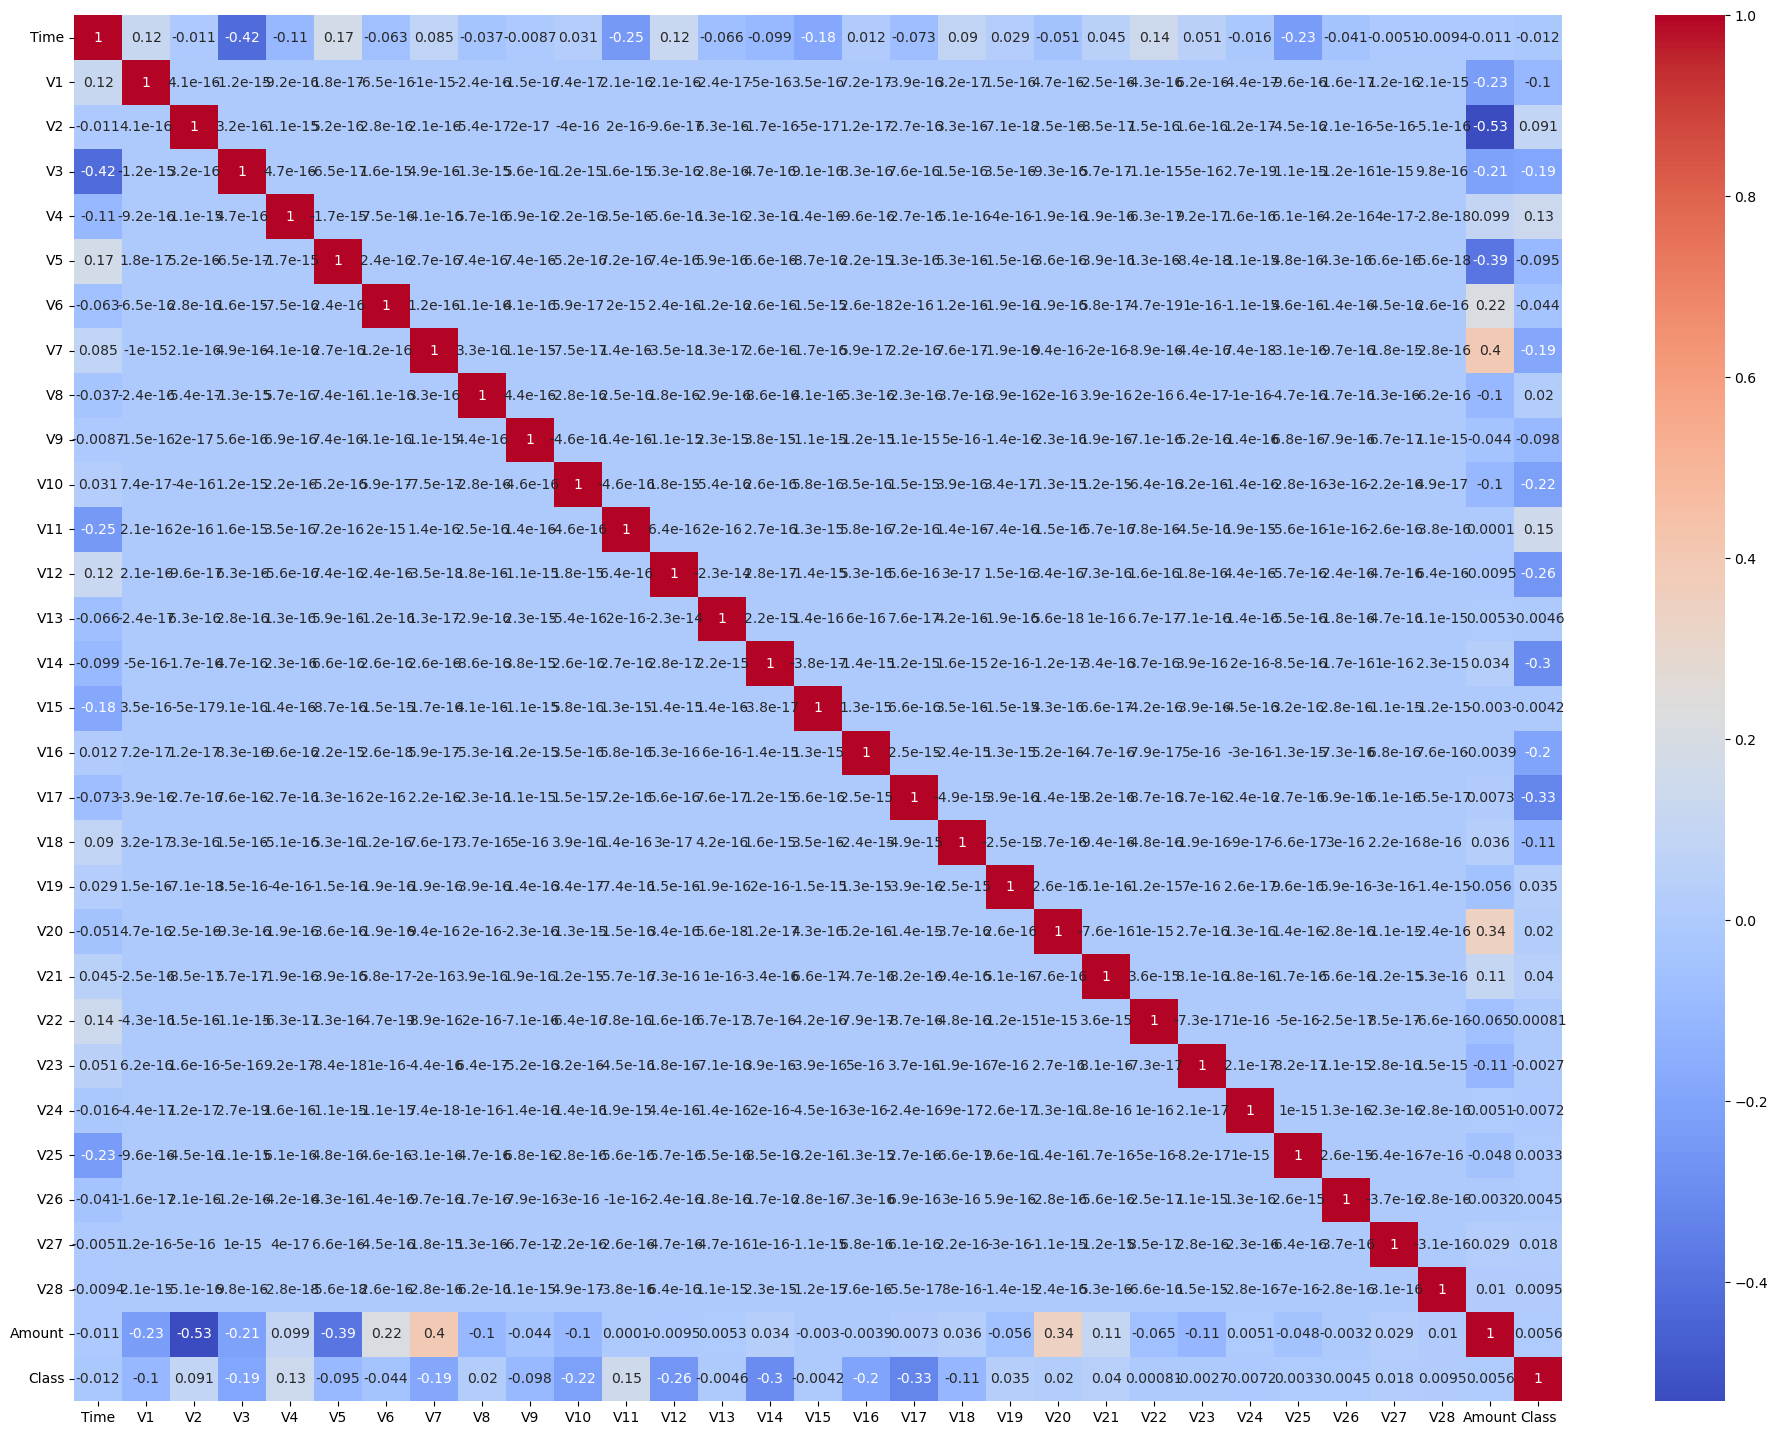

In [9]:
corr=df.corr()

plt.figure(figsize=(24,18))

sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [10]:
delta_time=pd.to_timedelta(df['Time'],unit='s')
df['Time_hour']=(delta_time.dt.components.hours).astype(int)

In [11]:
y=df['Class']
x=df.drop(['Class'],axis=1)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)


# Modell Building

In [13]:
df_results=pd.DataFrame(columns=['Methodology','Model','Accuracy','Roc_Value','threshold'])

In [14]:
#confusion metrics
def plot_conf_metrix(y_test,pred_test):
    cm=confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Accent)
    categoryNames=['Non_fraud','Fraud']
    plt.title('Confusion_Matrix-Test Data')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    ticks=np.arange(len(categoryNames))
    plt.xticks(ticks,categoryNames,rotation=45)
    plt.yticks(ticks,categoryNames)
    s=[['TN','FP'],['FN','TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]),fontsize=12)
    plt.show()

In [15]:
def build_run_log_model(df_results,Methodology,x_train,y_train,x_test,y_test):
    from sklearn import linear_model
    from sklearn.model_selection import KFold
    
    num_c=list(np.power(10.0,np.arange(-10,10)))
    cv_num=KFold(n_splits=10,shuffle=True,random_state=42)
    #cs=it sets the strength of regulerization (smaller cs higher the strength)
    #penalty (legulerization type)
    #metircs selection
    #cv= by default stratified with 5 splits
    #max_iteration model can run to receive optimum result
    #fit_intercept=Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    #solver=Algorithm to use in the optimization problem
    #Tolerance for stopping criteria.
    
    searchCV_l2=linear_model.LogisticRegressionCV(Cs=num_c,penalty='l2',scoring='roc_auc',cv=cv_num,random_state=42,
                                                max_iter=10000,fit_intercept=True,solver='newton-cg',tol=10)
    searchCV_l1=linear_model.LogisticRegressionCV(Cs=num_c,penalty='l1',scoring='roc_auc',cv=cv_num,random_state=42,
                                                max_iter=10000,fit_intercept=True,solver='liblinear',tol=10)
    
    searchCV_l1.fit(x_train,y_train)
    searchCV_l2.fit(x_train,y_train)
    
    print('Max_auc_roc l1:',searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max_auc_roc l2:',searchCV_l2.scores_[1].mean(axis=0).max())
    
    print("Parameters for l1 regulerisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)
    
    print("Parameters for l2 regulerisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)
    
    
    y_pred_l1=searchCV_l1.predict(x_test)
    y_pred_l2=searchCV_l2.predict(x_test)
    
    
    y_pred_l1_prob=searchCV_l1.predict_proba(x_test)[:,1]
    y_pred_l2_prob=searchCV_l2.predict_proba(x_test)[:,1]
    
    accuracy_l1=metrics.accuracy_score(y_pred=y_pred_l1,y_true=y_test)
    accuracy_l2=metrics.accuracy_score(y_pred=y_pred_l2,y_true=y_test)
    
    print("Accuracy of l1 model".format(accuracy_l1))
    print("Confusion Matrix")
    plot_conf_metrix(y_test,y_pred_l1)
    print("Classification report")
    print(classification_report(y_test,y_pred_l1))
    
    
    print("Accuracy of l2 model".format(accuracy_l2))
    print("Confusion Matrix")
    plot_conf_metrix(y_test,y_pred_l2)
    print("Classification report")
    print(classification_report(y_test,y_pred_l2))
    
    
    l2_roc_value=roc_auc_score(y_test,y_pred_l2_prob)
    print("ROC value:".format(l2_roc_value))
    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_l2_prob)
    threshold=thresholds[np.argmax(tpr-fpr)]
    print("l2 Thresholds".format(threshold))
    
    roc_auc=metrics.auc(tpr,fpr)
    print("ROC for test dataset",'{:-1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc"+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_results.append(pd.DataFrame({'Methodology':Methodology,'Model':'Logictics regression L2','Accuracy':accuracy_l2,
                                            'Roc_Value':l2_roc_value,'threshold':threshold},index[0]),ignore_index=True)
    
    l1_roc_value=roc_auc_score(y_test,y_pred_l1_prob)
    print("ROC value:".format(l1_roc_value))
    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_l1_prob)
    threshold=thresholds[np.argmax(tpr-fpr)]
    print("l1 Thresholds".format(threshold))
    
    roc_auc=metrics.auc(tpr,fpr)
    print("ROC for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc"+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_results.append(pd.DataFrame({'Methodology':Methodology,'Model':'Logictics regression L1','Accuracy':accuracy_l1,
                                            'Roc_Value':l1_roc_value,'threshold':threshold},index[0]),ignore_index=True)
    
    return df_results

In [16]:
def buildKNN(df_results,Methodology,x_train,y_train,x_test,y_test):
    #N-neighbours Number of neighbors to use by default for kneighbors queries
    knn=KNeighborsClassifier(n_neighbors=5,n_jobs=16)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    print("model score".format(score))
    
    y_pred=knn.predict(x_test)
    knn_accuracy=metrics.accuracy_score(y_pred=y_pred,y_true=y_test)
    print("Accuracy of model".format(knn_accuracy))
    print("Confusion Matrix")
    plot_conf_metrix(y_test,y_pred)
    print("Classification report")
    print(classification_report(y_test,y_pred))
    
    y_pred_prob=knn.predict_proba(x_test)[:,1]
       
    knn_roc_value=roc_auc_score(y_test,y_pred_prob)
    print("ROC value:".format(knn_roc_value))
    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob)
    threshold=thresholds[np.argmax(tpr-fpr)]
    print("Thresholds".format(threshold))
    
    roc_auc=metrics.auc(tpr,fpr)
    print("ROC for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc"+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_results.append(pd.DataFrame({'Methodology':Methodology,'Model':'KNN','Accuracy':knn_accuracy,
                                            'Roc_Value':knn_roc_value,'threshold':threshold},index[0]),ignore_index=True)
    
    return df_results

In [17]:
def treemodels(df_results,Methodology,x_train,y_train,x_test,y_test):
    criteria=['gini','entropy']
    scores={}
    
    for c in criteria:
        dt=DecisionTreeClassifier(criterion=c,random_state=42)
        dt.fit(x_train,y_train)
        y_pred=dt.predict(x_test)
        test_score=dt.score(x_test,y_test)
        print("model score".format(test_score))
        tree_prob=dt.predict_proba(x_test)[:,1]
        tree_roc_value=roc_auc_score(y_test,tree_prob)
        scores=test_score
        print(c+"test_roc_curve".format(test_score))
        print("Confusion Matrix")
        plot_conf_metrix(y_test,y_pred)
        print("Classification report")
        print(classification_report(y_test,y_pred))
        print(c+"Tree ROC value:".format(tree_roc_value))
        fpr,tpr,thresholds=metrics.roc_curve(y_test,tree_prob)
        threshold=thresholds[np.argmax(tpr-fpr)]
        print("Thresholds".format(threshold))
    
        roc_auc=metrics.auc(tpr,fpr)
        print("ROC for test dataset",'{:.1%}'.format(roc_auc))
        plt.plot(fpr,tpr,label="Test, auc"+str(roc_auc))
        plt.legend(loc=4)
        plt.show()    
        
        df_results.append(pd.DataFrame({'Methodology':Methodology,'Model':'Decision Tree'.format(c),'Accuracy':test_score,
                                            'Roc_Value':tree_roc_value,'threshold':threshold},index[0]),ignore_index=True)
        return df_results

In [18]:
def randomforestmodels(df_results,Methodology,x_train,y_train,x_test,y_test):
    rf_model=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt',random_state=42)
    
    rf_model.fit(x_train,y_train)
    rf_test_score=rf_model.score(x_test,y_test)
    print("model score".format(rf_test_score))
    y_pred=rf_model.predict(x_test)
    print("Confusion Matrix")
    plot_conf_metrix(y_test,y_pred) 
    print("Classification report")
    print(classification_report(y_test,y_pred))
    rf_prob=rf_model.predict_proba(x_test)[:,1]
    roc_value=roc_auc_score(y_test,rf_prob)
    print("Random_forest_roc_curve".format(roc_value))
    fpr,tpr,thresholds=metrics.roc_curve(y_test,rf_prob)
    threshold=thresholds[np.argmax(tpr-fpr)]
    print("Thresholds".format(threshold))
    roc_auc=metrics.auc(tpr,fpr)
    print("ROC for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc"+str(roc_auc))
    plt.legend(loc=4)
    plt.show()    
    
    df_results.append(pd.DataFrame({'Methodology':Methodology,'Model':'Random Forest Classifier','Accuracy':rf_test_score,
                                            'Roc_Value':roc_value,'threshold':threshold},index[0]),ignore_index=True)
    return df_results

In [19]:
def xgboostmodels(df_results,Methodology,x_train,y_train,x_test,y_test):
    xgbmodel=XGBClassifier(random_state=42)
    xgbmodel.fit(x_train,y_train)
    y_pred=xgbmodel.predict(x_test)
    xgb_test_score=xgbmodel.score(x_test,y_test)
    print("model score".format(xgb_test_score))
    
    print("Confusion Matrix")
    plot_conf_metrix(y_test,y_pred) 
    print("Classification report")
    print(classification_report(y_test,y_pred))
    xgb_prob=xgbmodel.predict_proba(x_test)[:,1]
    roc_value=roc_auc_score(y_test,xgb_prob)
    print("Random_forest_roc_curve".format(roc_value))
    fpr,tpr,thresholds=metrics.roc_curve(y_test,xgb_prob)
    threshold=thresholds[np.argmax(tpr-fpr)]
    print("Thresholds".format(threshold))
    roc_auc=metrics.auc(tpr,fpr)
    print("ROC for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc"+str(roc_auc))
    plt.legend(loc=4)
    plt.show()   
    
    df_results.append(pd.DataFrame({'Methodology':Methodology,'Model':'XGBoost Classifier','Accuracy':xgb_test_score,
                                            'Roc_Value':roc_value,'threshold':threshold},index[0]),ignore_index=True)
    return df_results
        

In [20]:
def SVMmodel(df_results,Methodology,x_train,y_train,x_test,y_test):
    from sklearn.svm import SVC
    
    clf=SVC(kernel='sigmoid',random_state=42)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    svm_test_score=clf.score(x_test,y_test)
    print("model score".format(svm_test_score))
    
    print("Confusion Matrix")
    plot_conf_metrix(y_test,y_pred) 
    print("Classification report")
    print(classification_report(y_test,y_pred))
    svm_prob=clf.predict_proba(x_test)[:,1]
    roc_value=roc_auc_score(y_test,svm_prob)
    print("Random_forest_roc_curve".format(roc_value))
    fpr,tpr,thresholds=metrics.roc_curve(y_test,svm_prob)
    threshold=thresholds[np.argmax(tpr-fpr)]
    print("Thresholds".format(threshold))
    roc_auc=metrics.auc(tpr,fpr)
    print("ROC for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc"+str(roc_auc))
    plt.legend(loc=4)
    plt.show()   
    
    df_results.append(pd.DataFrame({'Methodology':Methodology,'Model':'SVM Classifier','Accuracy':svm_test_score,
                                            'Roc_Value':roc_value,'threshold':threshold},index[0]),ignore_index=True)
    return df_results

In [21]:
from sklearn.model_selection import RepeatedKFold

rkf=RepeatedKFold(n_splits=5,n_repeats=10,random_state=None)

for train_index,test_index in rkf.split(x,y):
    print("Train:",train_index,"Test:",test_index)
    x_train_cv,x_test_cv=x.iloc[train_index],x.iloc[test_index]
    y_train_cv,y_test_cv=y.iloc[train_index],y.iloc[test_index]
    

Train: [     0      1      2 ... 284804 284805 284806] Test: [     3     24     25 ... 284795 284796 284800]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     7     13     26 ... 284789 284793 284794]
Train: [     0      1      2 ... 284799 284800 284804] Test: [     4      6      8 ... 284803 284805 284806]
Train: [     0      1      3 ... 284804 284805 284806] Test: [     2      5     14 ... 284780 284782 284799]
Train: [     2      3      4 ... 284803 284805 284806] Test: [     0      1      9 ... 284792 284798 284804]
Train: [     1      2      3 ... 284804 284805 284806] Test: [     0      7     10 ... 284789 284797 284801]
Train: [     0      2      3 ... 284801 284804 284806] Test: [     1      6     21 ... 284802 284803 284805]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     8     11     17 ... 284795 284799 284800]
Train: [     0      1      2 ... 284803 284804 284805] Test: [     4      5     15 ... 284792 284798 284806]
Train: [     0     

logistics Regression L1 & L2 Regulerisation


C:\Users\rathakra2201\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rathakra2201\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rathakra2201\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rathakra2201\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rathakra2201\Anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algo

Max_auc_roc l1: 0.9580373718330659
Max_auc_roc l2: 0.985307163182114
Parameters for l1 regulerisations
[[-2.63529020e-05  9.10433663e-02 -1.09500927e-01 -4.98358609e-01
   7.20521813e-03 -8.93212005e-02 -9.19974163e-03  7.98580485e-02
  -5.88394246e-02 -1.45136831e-01 -6.38962514e-02 -2.34408583e-01
   1.16090072e-01 -1.71183421e-01 -3.58624375e-01 -2.34455815e-01
  -1.41988325e-01 -3.35822388e-01  6.24780213e-02 -6.24819791e-03
   1.67028563e-01  1.47117329e-01  2.79387132e-01  1.03887628e-01
  -5.86862616e-02 -6.76791880e-01  1.09214382e-02 -5.32736843e-02
   9.40798408e-02 -4.13333504e-03 -1.37575514e-01]]
[-0.91270058]
{1: array([[0.5       , 0.58504341, 0.58504341, 0.58504341, 0.58504341,
        0.56949824, 0.61711395, 0.8551022 , 0.89233862, 0.89673342,
        0.9010308 , 0.89334376, 0.94076699, 0.90667549, 0.94654594,
        0.91451936, 0.90290444, 0.96859124, 0.96345268, 0.95466664],
       [0.5       , 0.59787197, 0.59787197, 0.59787197, 0.59787197,
        0.57788492, 0.63

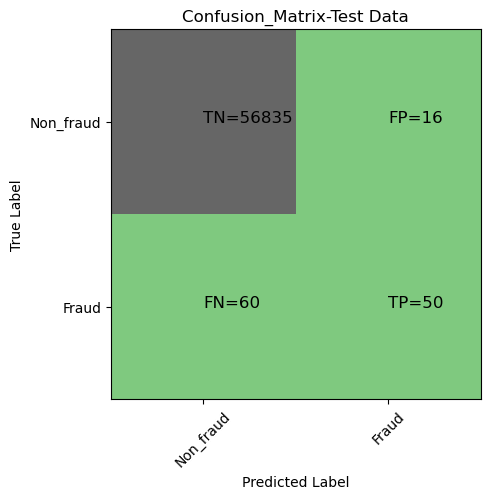

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56851
           1       0.76      0.45      0.57       110

    accuracy                           1.00     56961
   macro avg       0.88      0.73      0.78     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of l2 model
Confusion Matrix


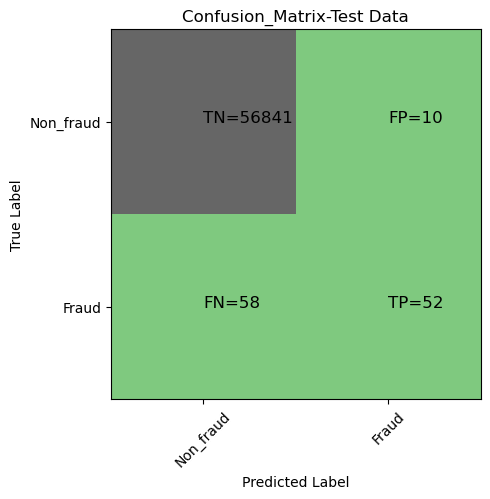

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56851
           1       0.84      0.47      0.60       110

    accuracy                           1.00     56961
   macro avg       0.92      0.74      0.80     56961
weighted avg       1.00      1.00      1.00     56961

ROC value:
l2 Thresholds
ROC for test dataset 2.471213%


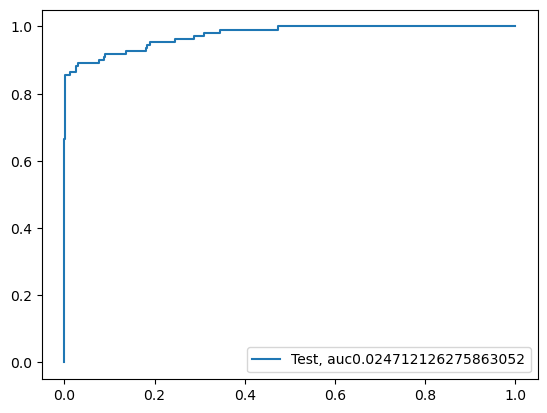

NameError: name 'index' is not defined

In [22]:
print("logistics Regression L1 & L2 Regulerisation")
start_time=time.time()
df_results=build_run_log_model(df_results,"RepeatedKFold cross validation",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)



In [ ]:
print("Knn Model")
start_time=time.time()
df_results=buildKNN(df_results,"RepeatedKFold cross validation",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)

print("Decision Tree")
start_time=time.time()
df_results=treemodels(df_results,"RepeatedKFold cross validation",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)


print("RandomForest")
start_time=time.time()
df_results=randomforestmodels(df_results,"RepeatedKFold cross validation",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)

print("XGboost")
start_time=time.time()
df_results=xgboostmodels(df_results,"RepeatedKFold cross validation",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)

print("SVM")
start_time=time.time()
df_results=SVMmodel(df_results,"RepeatedKFold cross validation",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)



In [ ]:
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=5,random_state=None)

for train_index,test_index in skf.split(x,y):
    print("Train:",train_index,"Test:",test_index)
    x_train_skf_cv,x_test_skf_cv=x.iloc[train_index],x.iloc[test_index]
    y_train_skf_cv,y_test_skf_cv=y.iloc[train_index],y.iloc[test_index]
    

In [ ]:
print("logistics Regression L1 & L2 Regulerisation")
start_time=time.time()
df_results=build_run_log_model(df_results,"StratifiedKFold cross validation",x_train_skf_cv,y_train_skf_cv,x_test_skf_cv,y_test_skf_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)

print("Knn Model")
start_time=time.time()
df_results=buildKNN(df_results,"StratifiedKFold cross validation",x_train_skf_cv,y_train_skf_cv,x_test_skf_cv,y_test_skf_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)

print("Decision Tree")
start_time=time.time()
df_results=treemodels(df_results,"StratifiedKFold cross validation",x_train_skf_cv,y_train_skf_cv,x_test_skf_cv,y_test_skf_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)


print("RandomForest")
start_time=time.time()
df_results=randomforestmodels(df_results,"StratifiedKFold cross validation",x_train_skf_cv,y_train_skf_cv,x_test_skf_cv,y_test_skf_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)

print("XGboost")
start_time=time.time()
df_results=xgboostmodels(df_results,"StratifiedKFold cross validation",x_train_skf_cv,y_train_skf_cv,x_test_skf_cv,y_test_skf_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)

print("SVM")
start_time=time.time()
df_results=SVMmodel(df_results,"StratifiedKFold cross validation",x_train_skf_cv,y_train_skf_cv,x_test_skf_cv,y_test_skf_cv)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=5,random_state=None)

for fold,(train_index,test_index) in enumerate(skf.split(x,y),1):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    ros = RandomOverSampler(sampling_stratergy=0.5)
    x_over,y_over=ros.fit_resample(x_train,y_train)

x_over=pd.DataFrame(data=x_over,columns=cols)

In [ ]:
#Data imbalancing and startified Kfold

print("logistics Regression L1 & L2 Regulerisation")
start_time=time.time()
df_results=build_run_log_model(df_results,"Data_Imbalance_Handling",x_over,y_over,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)

print("Knn Model")
start_time=time.time()
df_results=buildKNN(df_results,"Data_Imbalance_Handling",x_over,y_over,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)

print("Decision Tree")
start_time=time.time()
df_results=treemodels(df_results,"Data_Imbalance_Handling",x_over,y_over,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)


print("RandomForest")
start_time=time.time()
df_results=randomforestmodels(df_results,"Data_Imbalance_Handling",x_over,y_over,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)

print("XGboost")
start_time=time.time()
df_results=xgboostmodels(df_results,"Data_Imbalance_Handling",x_over,y_over,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)

print("SVM")
start_time=time.time()
df_results=SVMmodel(df_results,"Data_Imbalance_Handling",x_over,y_over,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*60)


In [ ]:
#Oversampling using SMOTE (Synthetic Minority Over-sampling TEchnique)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=5,random_state=None)

for fold,(train_index,test_index) in enumerate(skf.split(x,y),1):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    smote = over_sampling.SMOTE(random_state=0)
    x_smote,y_smote=smote.fit_resample(x_train,y_train)

x_train_smote=pd.DataFrame(data=x_smote,columns=cols)

In [ ]:
Data_Imbalance_Handling="Smote Over Sampling with startifiedCV"

#Data imbalancing and startified Kfold

print("logistics Regression L1 & L2 Regulerisation")
start_time=time.time()
df_results=build_run_log_model(df_results,Data_Imbalance_Handling,x_smote,y_smote,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)

print("Knn Model")
start_time=time.time()
df_results=buildKNN(df_results,Data_Imbalance_Handling,x_smote,y_smote,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)

print("Decision Tree")
start_time=time.time()
df_results=treemodels(df_results,Data_Imbalance_Handling,x_smote,y_smote,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)


print("RandomForest")
start_time=time.time()
df_results=randomforestmodels(df_results,Data_Imbalance_Handling,x_smote,y_smote,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)

print("XGboost")
start_time=time.time()
df_results=xgboostmodels(df_results,Data_Imbalance_Handling,x_smote,y_smote,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)

print("SVM")
start_time=time.time()
df_results=SVMmodel(df_results,Data_Imbalance_Handling,x_smote,y_smote,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)


In [ ]:
#Oversampling using SMOTE (Synthetic Minority Over-sampling TEchnique)
from imblearn import over_sampling
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=5,random_state=None)

for fold,(train_index,test_index) in enumerate(skf.split(x,y),1):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    adasyn = over_sampling.ADASYN(random_state=0)
    x_adasyn,y_adasyn=adasyn.fit_resample(x_train,y_train)

x_train_adasyn=pd.DataFrame(data=x_adasyn,columns=cols)

In [ ]:
Data_Imbalance_Handling="adasyn Over Sampling with startifiedCV"

#Data imbalancing and startified Kfold

print("logistics Regression L1 & L2 Regulerisation")
start_time=time.time()
df_results=build_run_log_model(df_results,Data_Imbalance_Handling,x_adasyn,y_adasyn,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)

print("Knn Model")
start_time=time.time()
df_results=buildKNN(df_results,Data_Imbalance_Handlingx_adasyn,y_adasyn,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)

print("Decision Tree")
start_time=time.time()
df_results=treemodels(df_results,Data_Imbalance_Handling,x_adasyn,y_adasyn,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)


print("RandomForest")
start_time=time.time()
df_results=randomforestmodels(df_results,Data_Imbalance_Handling,x_adasyn,y_adasyn,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)

print("XGboost")
start_time=time.time()
df_results=xgboostmodels(df_results,Data_Imbalance_Handling,x_adasyn,y_adasyn,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)

print("SVM")
start_time=time.time()
df_results=SVMmodel(df_results,Data_Imbalance_Handling,x_adasyn,y_adasyn,x_test,y_test)
print("time taken to run the model"%(time.time()-start_time))
print('-'*80)